In [2]:
# !pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score, r2_score, silhouette_score
from kneed import knee_locator, KneeLocator
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [3]:
X = fruits[["sphericity", "weight"]]

In [4]:
X.describe()

,sphericity,weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


In [5]:
X_scaled = pd.DataFrame(minmax_scale(X),columns=X.columns)
X_scaled.head()

,sphericity,weight
0,1.000000,0.228916
1,0.873418,0.289157
2,0.898734,0.108434
3,0.869198,0.265060
4,0.983122,0.277108


In [6]:
X_scaled.describe()

,sphericity,weight
count,60.000000,60.000000
mean,0.466596,0.503012
std,0.285133,0.281356
min,0.000000,0.000000
25%,0.241561,0.277108
50%,0.476793,0.506024
75%,0.677215,0.759036
max,1.000000,1.000000


In [7]:
model = KMeans(n_clusters=2)
model.fit(X_scaled)

KMeans(n_clusters=2)

In [8]:
clusters = model.predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# shape is (2,2) which means there are 2 clusters and 2 features

centers = model.cluster_centers_
centers

array([[0.71573683, 0.24364123],
       [0.26275412, 0.71522453]])

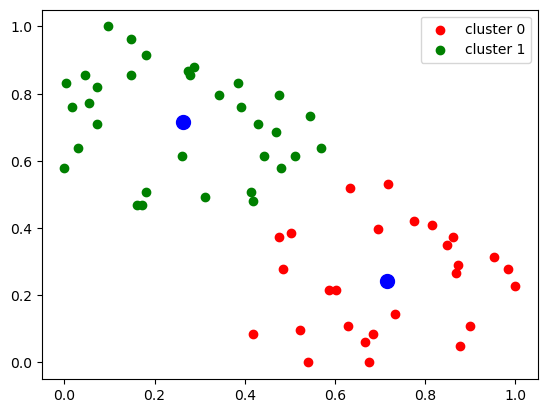

In [10]:
plt.scatter(x="sphericity", y="weight", data=X_scaled[clusters==0],c='red', label='cluster 0')
plt.scatter(x="sphericity", y="weight", data=X_scaled[clusters==1],c='green', label='cluster 1')
plt.scatter(centers[:,0], centers[:,1], c='blue', s=100)
plt.legend()
plt.show()

In [11]:
# Manually calculating "Inertia"

cluster_0 = np.sum((X_scaled.sphericity[clusters==0]-centers[0,0])**2 + (X_scaled.weight[clusters==0]-centers[0,1])**2)
cluster_1 = np.sum((X_scaled.sphericity[clusters==1]-centers[1,0])**2 + (X_scaled.weight[clusters==1]-centers[1,1])**2)
print(cluster_0, cluster_1)
inertia = cluster_0 + cluster_1
print(inertia)

1.3571424638810683 1.7605072212886859
3.117649685169754


In [12]:
# Directly asking the model what is the "Inertia"

model.inertia_

3.1176496851697544

In [13]:
# checking "inertia" using a loop

inertia_1 = []
for k in range(1,11):
    model =KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertia_1.append(model.inertia_)
print(inertia_1)

[9.467274275148688, 3.1176496851697544, 2.1432276797924104, 1.5230401260492152, 1.167781925261804, 0.9601429765454962, 0.7528274447723072, 0.6283315073329947, 0.5472473427254155, 0.44407416466040694]


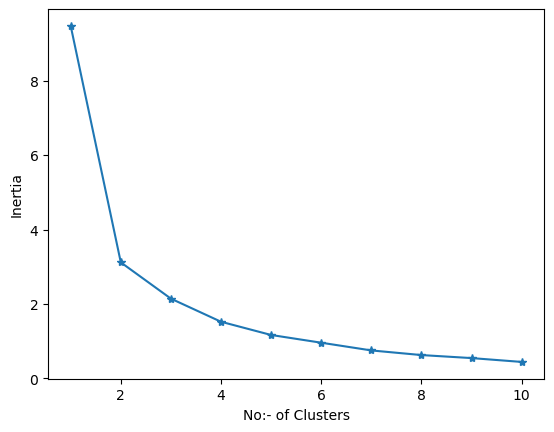

In [14]:
plt.plot(range(1,11), inertia_1, marker="*")
plt.xlabel("No:- of Clusters")
plt.ylabel("Inertia")
plt.show()

In [15]:
kl = KneeLocator(x=range(1,11), y=inertia_1, curve='convex', direction='decreasing')
kl.elbow, kl.knee

(2, 2)

In [16]:
silhouette_score(X_scaled, clusters)

0.5416823092715296

In [17]:
# checking "Silhouette Score" using a loop

sil_score = []
for k in range(2,15):
    model.fit(X_scaled)
    clusters = model.predict(X_scaled)
    sil_score.append(silhouette_score(X_scaled, clusters))
sil_score

[0.40667836961431547,
 0.37801687046082866,
 0.4026592171677732,
 0.40435901058642404,
 0.40213345194030203,
 0.4066390364134716,
 0.3760252868964553,
 0.3805320035720004,
 0.398040772552796,
 0.4076026823431243,
 0.3998619949524901,
 0.4332689207186761,
 0.3979210391822198]

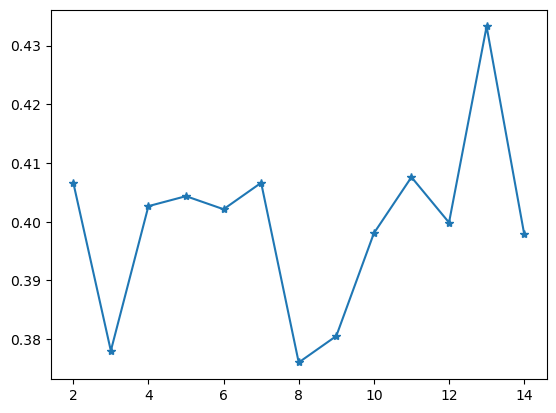

In [19]:
plt.plot(range(2,15), sil_score, marker="*")
plt.show()